<a href="https://colab.research.google.com/github/Adarshxinferno/datapoem_assignment/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gradio

     |████████████████████████████████| 2.0 MB 4.4 MB/s 
     |████████████████████████████████| 206 kB 49.3 MB/s 
     |████████████████████████████████| 1.9 MB 25.5 MB/s 
     |████████████████████████████████| 3.5 MB 40.9 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 961 kB 67.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=bd1122d8a42b3ff232f87946393f5d1d22a8dd228b8b96a8c3f130a329e2c844
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=c99c642dcd2645ffc31b4a059c2f9a745693a6365654e9f02601c53d44c808c0
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [4]:
import gradio as gr

In [67]:
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as k
from keras import layers
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

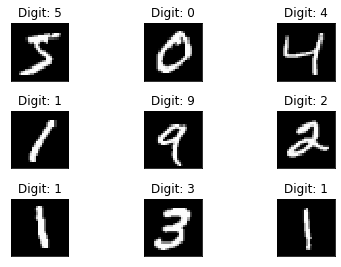

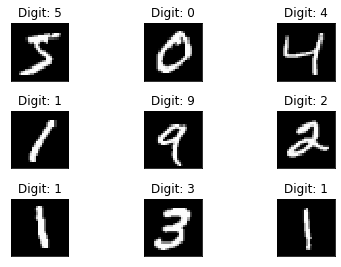

In [68]:

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [69]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols = 28, 28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [70]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_category)
y_test = tf.keras.utils.to_categorical(y_test, num_category)

In [71]:
##model building
from keras.models import Sequential
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [72]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [74]:
batch_size = 128
num_epoch = 20
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 137s 292ms/step - loss: 0.3357 - accuracy: 0.2148 - val_loss: 0.2957 - val_accuracy: 0.5193
Epoch 2/20
469/469 [==============================] - 138s 294ms/step - loss: 0.3310 - accuracy: 0.2337 - val_loss: 0.2905 - val_accuracy: 0.5520
Epoch 3/20
469/469 [==============================] - 137s 292ms/step - loss: 0.3261 - accuracy: 0.2547 - val_loss: 0.2851 - val_accuracy: 0.5767
Epoch 4/20
469/469 [==============================] - 137s 292ms/step - loss: 0.3212 - accuracy: 0.2748 - val_loss: 0.2794 - val_accuracy: 0.6030
Epoch 5/20
469/469 [==============================] - 137s 293ms/step - loss: 0.3154 - accuracy: 0.2955 - val_loss: 0.2736 - val_accuracy: 0.6254
Epoch 6/20
469/469 [==============================] - 138s 293ms/step - loss: 0.3101 - accuracy: 0.3153 - val_loss: 0.2674 - val_accuracy: 0.6501
Epoch 7/20
469/469 [==============================] - 138s 294ms/step - loss: 0.3049 - accuracy: 0.3332 - val_loss: 0.2612 -

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [76]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.1803572028875351
Test accuracy: 0.8108000159263611


In [96]:

def predict_image(img):
  img = img[:,:,0]
  img_3d=img.reshape(1,28,28,1)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [97]:
iface = gr.Interface(predict_image, inputs="image", outputs="label")

In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://41720.gradio.app
